In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#1）忽略警告的用法
#import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline
#2）内嵌绘图忽略plt.show()--------%matplotlib inline
#3)数据清洗三大块：缺失值，异常值，分类变量



In [2]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
df_train = pd.read_csv('C:/Users/Administrator/Desktop/picked_cal2.csv')
df_train.columns
#df_train=df_train[df_train['STATA']=='S1K3']

Index(['Well', 'Depth', 'Pore', 'GR', 'SP', 'CAL', 'K', 'TH', 'U', 'DEN', 'AC',
       'CN', 'PERM', 'STA', 'Lithcore', 'Lithdebris', 'Faces'],
      dtype='object')

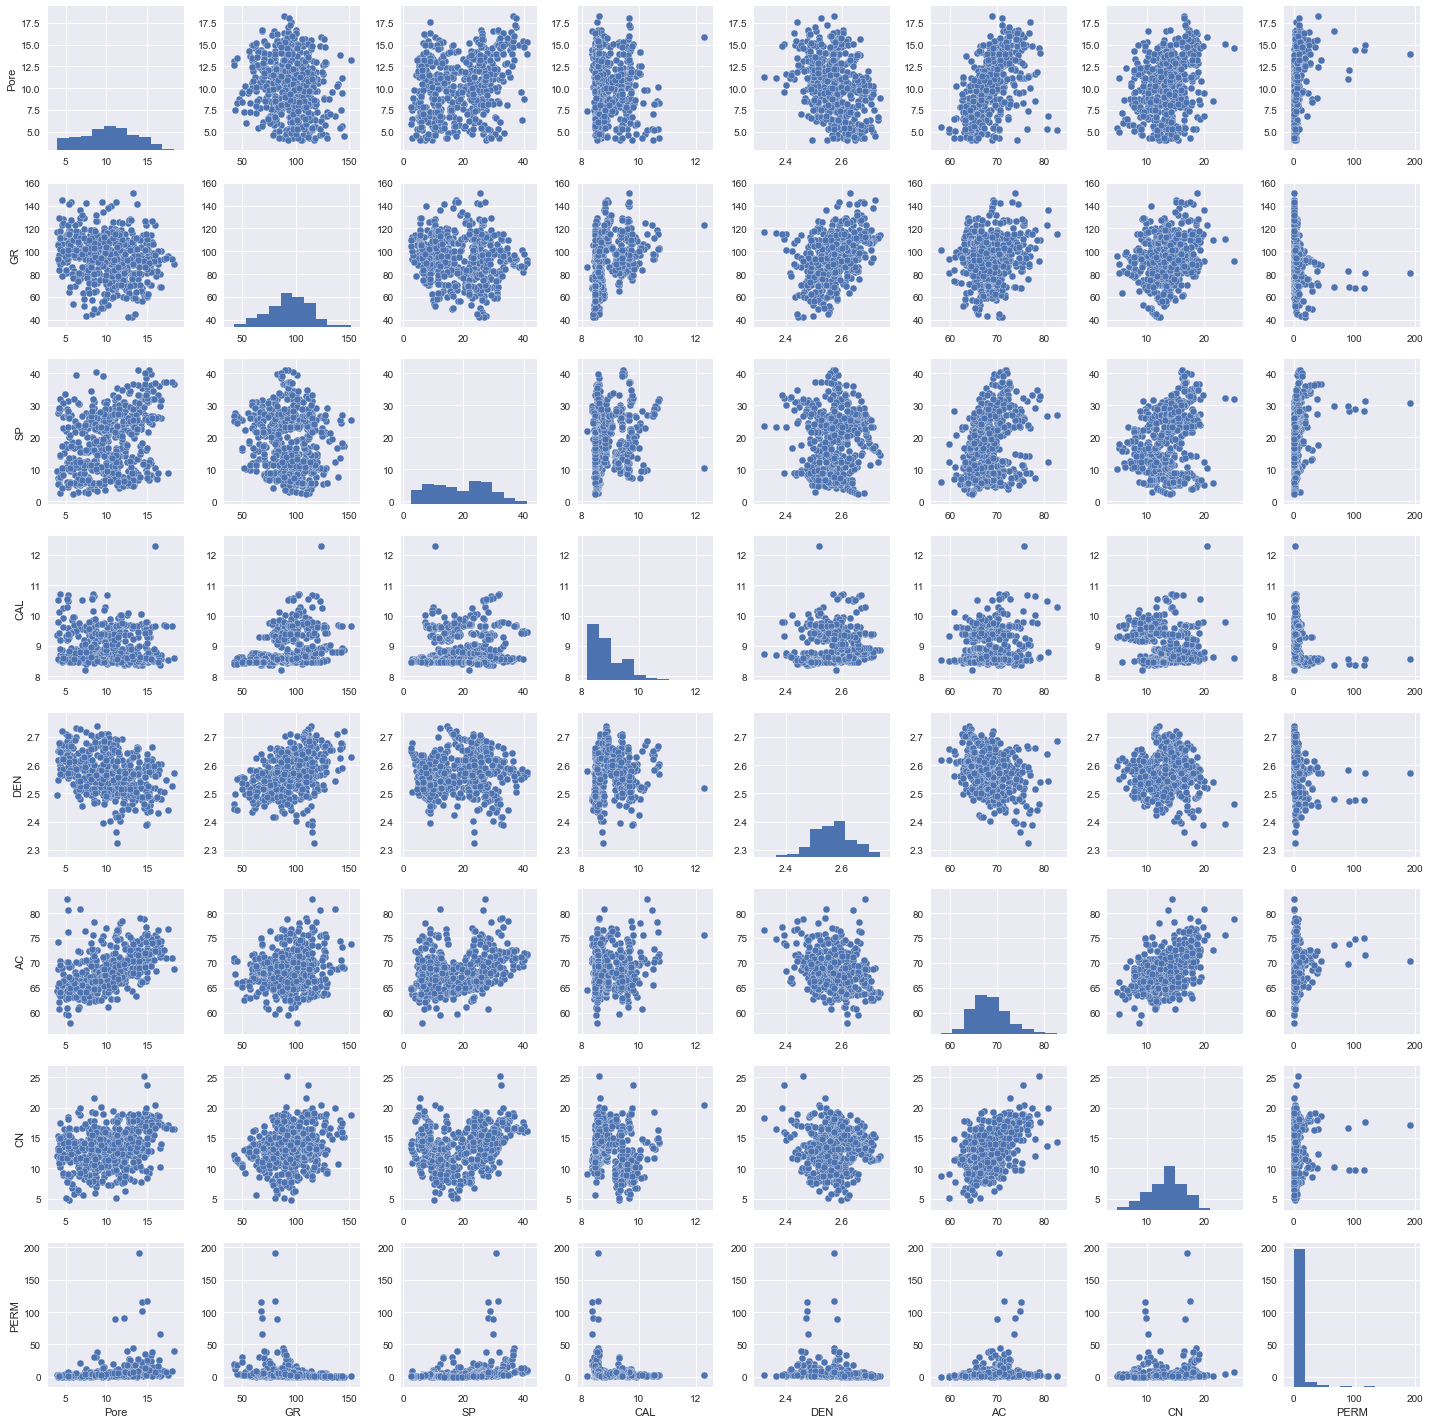

In [4]:
#df_train['k']=np.log(df_train['k'])
sns.set()
#cols = ['PORE','U','DEN', 'AC', 'CN']
cols = [ 'Pore', 'GR', 'SP', 'CAL', 'DEN', 'AC',
       'CN', 'PERM']
sns.pairplot(df_train[cols], size = 2.5)
#8）sns，pairplot

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 17 columns):
Well          556 non-null object
Depth         556 non-null float64
Pore          556 non-null float64
GR            556 non-null float64
SP            556 non-null float64
CAL           556 non-null float64
K             430 non-null float64
TH            430 non-null float64
U             430 non-null float64
DEN           556 non-null float64
AC            556 non-null float64
CN            556 non-null float64
PERM          556 non-null float64
STA           556 non-null object
Lithcore      397 non-null float64
Lithdebris    554 non-null float64
Faces         289 non-null float64
dtypes: float64(15), object(2)
memory usage: 73.9+ KB


In [6]:
#df_train=df_train.dropna(subset=['U','Lithcore','Faces'])
df_train=df_train[df_train['CAL']<12]
#dummies_Lithcore=pd.get_dummies(df_train['Lithcore'],prefix='Lithcore')
#dummies_Lithdebris=pd.get_dummies(df_train['Lithdebris'],prefix='Lithdebris')
#dummies_Faces=pd.get_dummies(df_train['Faces'],prefix='Faces')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 555
Data columns (total 17 columns):
Well          555 non-null object
Depth         555 non-null float64
Pore          555 non-null float64
GR            555 non-null float64
SP            555 non-null float64
CAL           555 non-null float64
K             429 non-null float64
TH            429 non-null float64
U             429 non-null float64
DEN           555 non-null float64
AC            555 non-null float64
CN            555 non-null float64
PERM          555 non-null float64
STA           555 non-null object
Lithcore      397 non-null float64
Lithdebris    553 non-null float64
Faces         288 non-null float64
dtypes: float64(15), object(2)
memory usage: 78.0+ KB


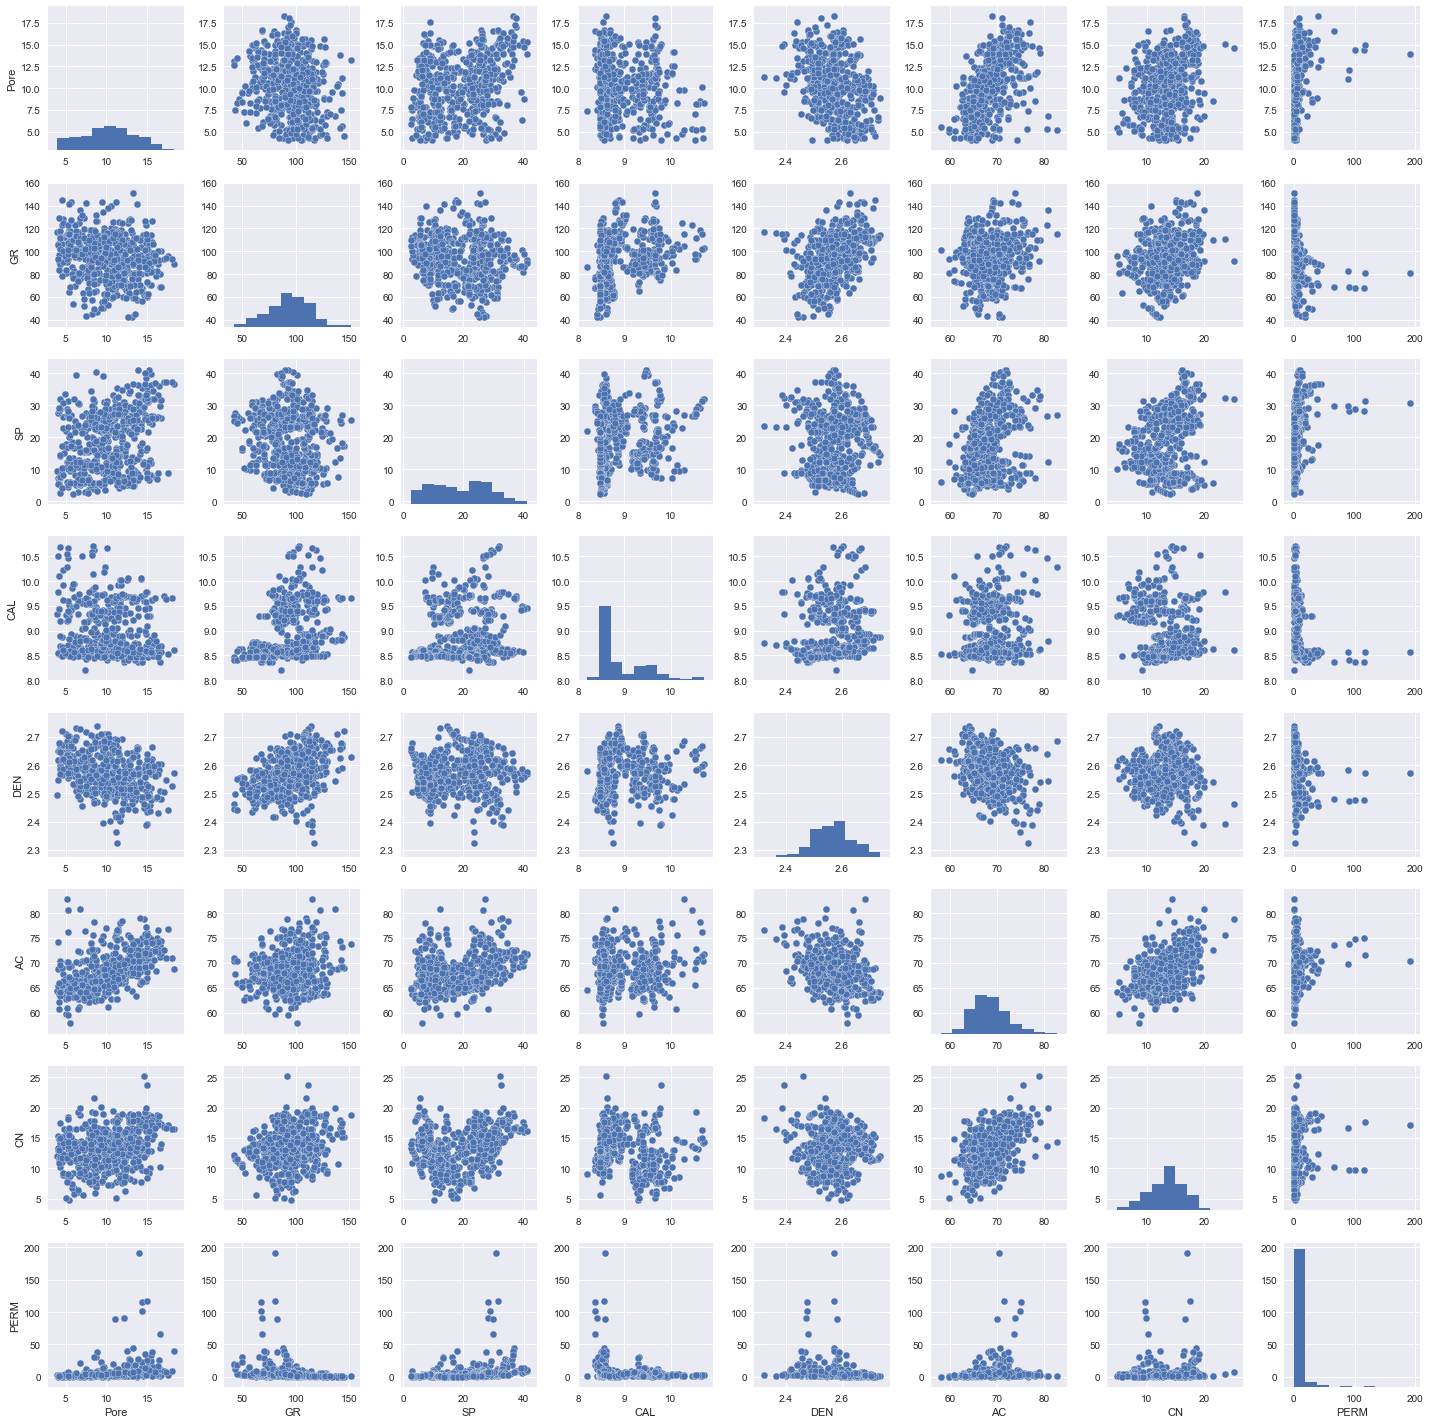

In [8]:
sns.set()
cols = [ 'Pore', 'GR', 'SP', 'CAL','DEN', 'AC',
       'CN', 'PERM']
sns.pairplot(df_train[cols], size = 2.5)

In [9]:

df_train=df_train[df_train['CAL']<9]

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 115 to 542
Data columns (total 17 columns):
Well          373 non-null object
Depth         373 non-null float64
Pore          373 non-null float64
GR            373 non-null float64
SP            373 non-null float64
CAL           373 non-null float64
K             247 non-null float64
TH            247 non-null float64
U             247 non-null float64
DEN           373 non-null float64
AC            373 non-null float64
CN            373 non-null float64
PERM          373 non-null float64
STA           373 non-null object
Lithcore      341 non-null float64
Lithdebris    373 non-null float64
Faces         106 non-null float64
dtypes: float64(15), object(2)
memory usage: 52.5+ KB


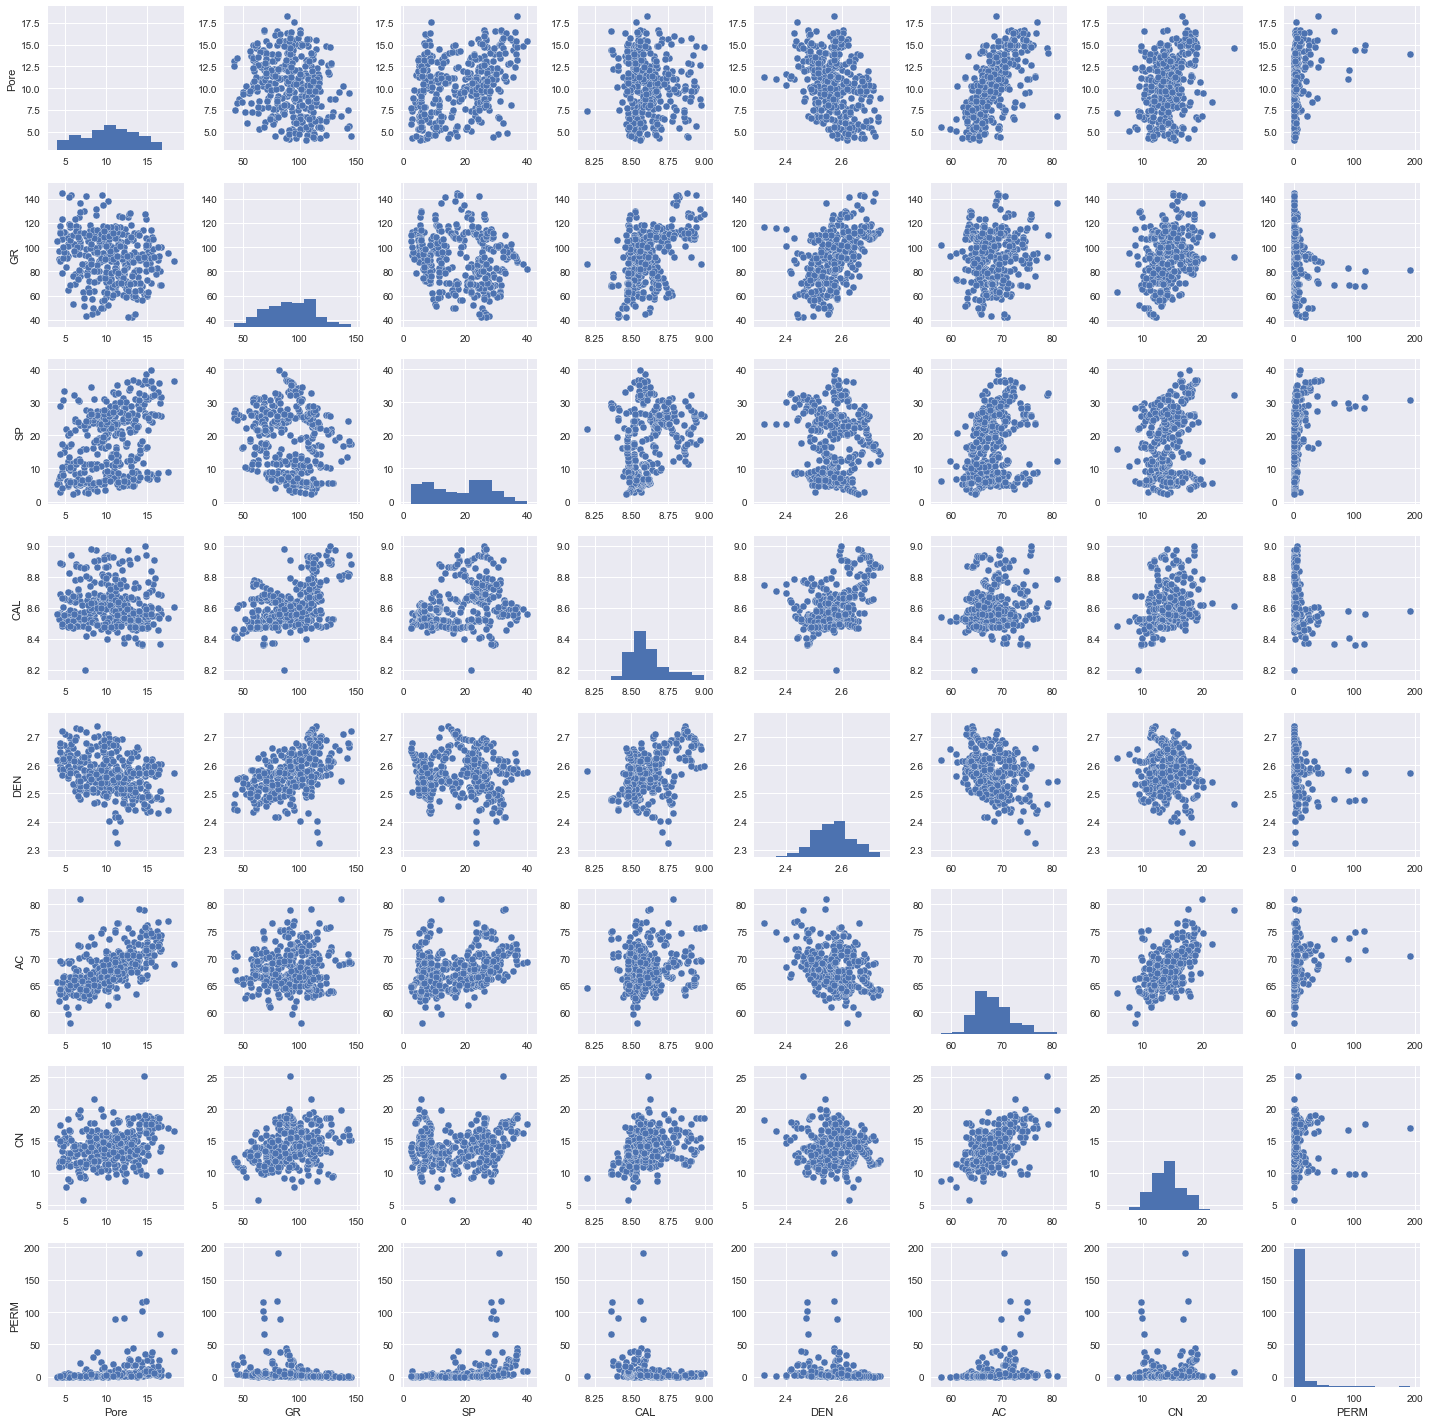

In [11]:
sns.set()
cols = [ 'Pore', 'GR', 'SP', 'CAL','DEN', 'AC',
       'CN', 'PERM']
sns.pairplot(df_train[cols], size = 2.5)

Text(0.5,1,'测井响应相关性热度图')

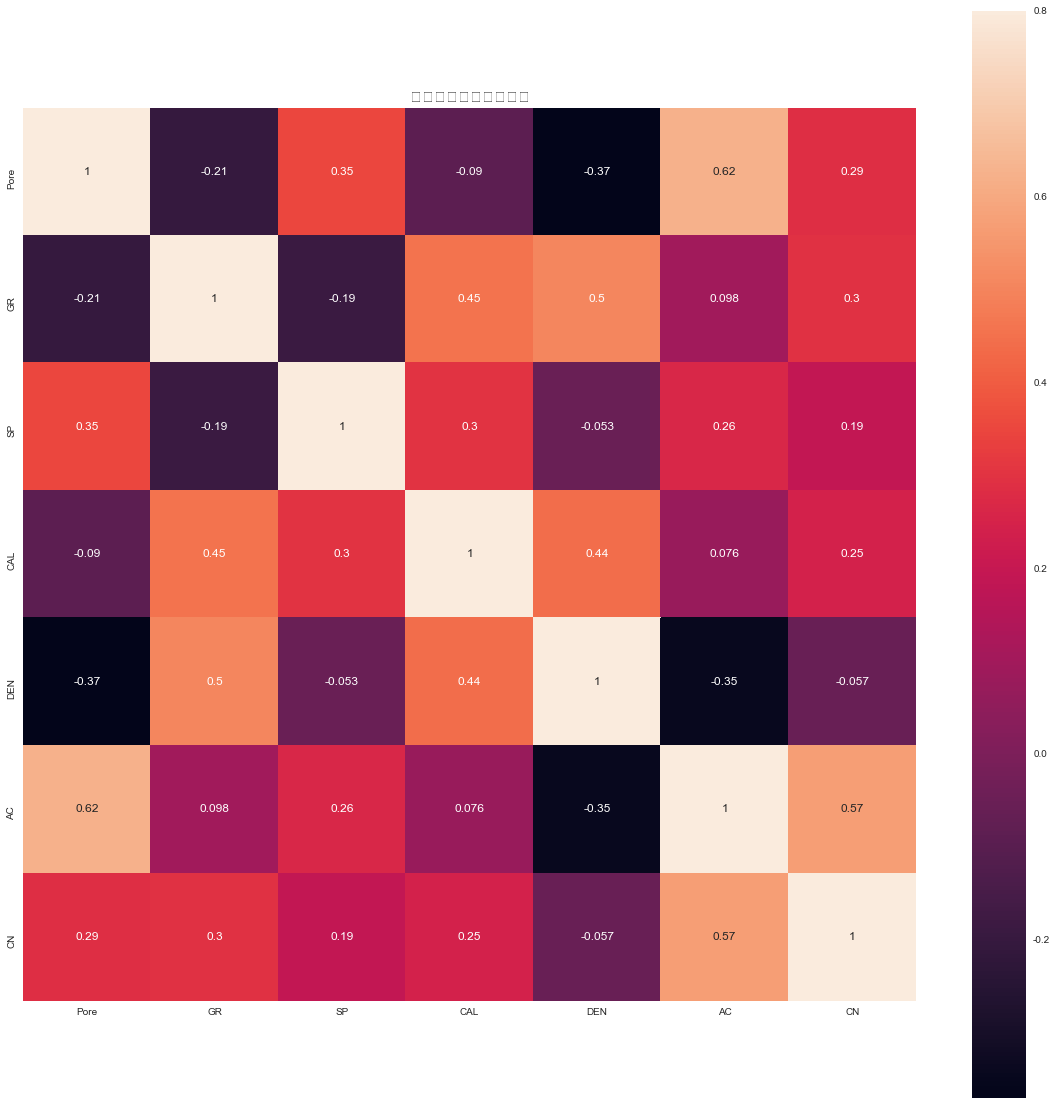

In [12]:
df_train=df_train.drop(['STA','Well','Lithcore','Lithdebris','Depth','PERM','U','TH','K','Faces'],axis=1)
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, annot=True, square=True);
#6）sns.heatmap绘制相关性热度图，
plt.title(u"测井响应相关性热度图",fontsize=16)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 115 to 542
Data columns (total 7 columns):
Pore    373 non-null float64
GR      373 non-null float64
SP      373 non-null float64
CAL     373 non-null float64
DEN     373 non-null float64
AC      373 non-null float64
CN      373 non-null float64
dtypes: float64(7)
memory usage: 33.3 KB


In [14]:
#A=df_train[[ 'U','DEN', 'AC', 'CN']]
#A=df_train[[ 'GR','CAL','U', 'TH','K','DEN', 'AC', 'CN']]
A=df_train.drop(['Pore','DEN','CAL','CN'],axis=1)
B=df_train[['Pore']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(A)
scaler2 = StandardScaler().fit(B)


In [15]:
print(scaler.mean_,scaler.var_)

print(scaler2.mean_,scaler2.var_)

[ 91.26442627  18.31382306  68.17012869] [ 425.559213     91.86015374   11.95134429]
[ 10.50344504] [ 10.19704973]


In [16]:
AA=scaler.transform(A)
BB=scaler2.transform(B)

In [17]:

#df_cal['PORE']=scale(df_cal['PORE'])

#df_cal['DEN']=scale(df_cal['DEN'])
#df_cal['AC']=scale(df_cal['AC'])
#df_cal['CN']=scale(df_cal['CN'])

In [18]:
#df_cal['PORE']

In [19]:
#df_cal

#df_cal=df_cal[df_cal['K'].isnull().values==False]


In [20]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
X=AA
y=BB
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=13)

the r2_score is 0.388411789195 	mean_absolute_error is 0.589255489322 	 the mean_squared_error is 0.56990571891


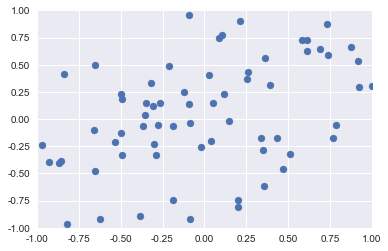

0.709554989856


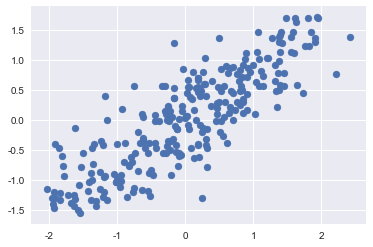

In [21]:
clf_KNN=KNeighborsRegressor()
clf_KNN.fit(X_train,y_train)
predicts_knn=clf_KNN.predict(X_test)
predicts_knnn=clf_KNN.predict(X_train)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
cross_val_score(clf_KNN,X,y,cv=5,scoring='r2')
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_knn),mean_absolute_error(y_test,predicts_knn),mean_squared_error(y_test,predicts_knn)))
plt.scatter(y_test,predicts_knn)
axis([-1,1,-1,1])
plt.show()
print(r2_score(y_train,predicts_knnn))

plt.scatter(y_train,predicts_knnn)
plt.show()


the r2_score is 0.387246940106 	mean_absolute_error is 0.569478456868 	 the mean_squared_error is 0.570991178286


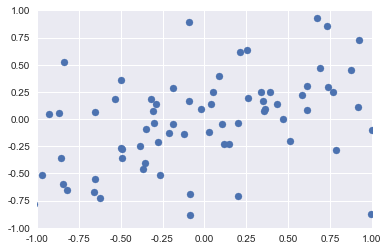

0.508658143851


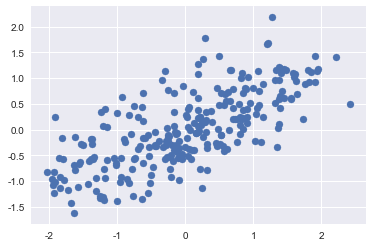

In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
cross_val_score(lr,X,y,cv=5)
lr.fit(X_train,y_train)
predicts_lr=lr.predict(X_test)
predicts_lrr=lr.predict(X_train)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_lr),mean_absolute_error(y_test,predicts_lr),mean_squared_error(y_test,predicts_lr)))
plt.scatter(y_test,predicts_lr)

axis([-1,1,-1,1])
plt.show()
print(r2_score(y_train,predicts_lrr))
plt.scatter(y_train,predicts_lrr)
plt.show()


[ 0.38294599  0.14707695  0.38684026  0.09493228  0.09198602]
the r2_score is 0.435094597009 	mean_absolute_error is 0.550499231239 	 the mean_squared_error is 0.526404554764


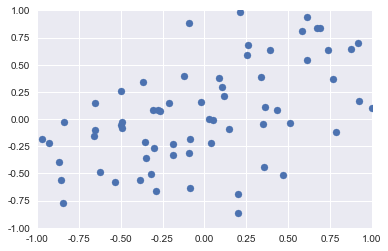

0.938200070069


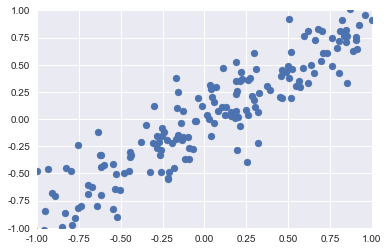

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
rfr=RandomForestRegressor(n_estimators=1500)
print(cross_val_score(rfr,X,y,cv=5))
rfr.fit(X_train,y_train)
predicts_rfr=rfr.predict(X_test)
predicts_rfrr=rfr.predict(X_train)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_rfr),mean_absolute_error(y_test,predicts_rfr),mean_squared_error(y_test,predicts_rfr)))
plt.scatter(y_test,predicts_rfr)
axis([-1,1,-1,1])
plt.show()
print(r2_score(y_train,predicts_rfrr))
plt.scatter(y_train,predicts_rfrr)
axis([-1,1,-1,1])
plt.show()

[ 0.40759625  0.22740456  0.45950022  0.15745743  0.16596009]
the r2_score is 0.441505535024 	mean_absolute_error is 0.543603107092 	 the mean_squared_error is 0.520430551058


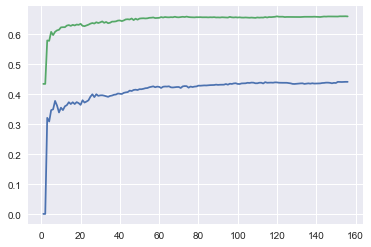

0.659687840467


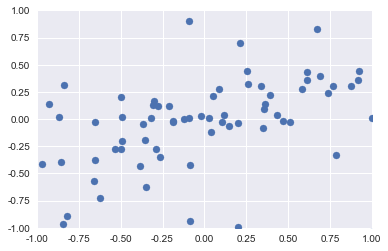

In [25]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(n_estimators=1500,random_state=5,learning_rate=0.1)
print(cross_val_score(abr,X,y,cv=5))
abr.fit(X_train,y_train)
predicts_abr=abr.predict(X_test)
predicts_abrr=abr.predict(X_train)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_abr),mean_absolute_error(y_test,predicts_abr),mean_squared_error(y_test,predicts_abr)))
plt.plot(range(1,157),[r2_score for r2_score in abr.staged_score(X_test,y_test)])
plt.plot(range(1,157),[r2_score for r2_score in abr.staged_score(X_train,y_train)])
plt.show()
print(r2_score(y_train,predicts_abrr))
plt.scatter(y_test,predicts_abr)
axis([-1,1,-1,1])

plt.show()

In [26]:
df_log = pd.read_csv('C:/Users/Administrator/Desktop/TZ127curve.csv')
df_log.columns

Index(['DEPTH', 'GR', 'SP', 'AC'], dtype='object')

In [28]:
X_call=df_log[['GR','SP','AC']]

In [29]:
X_call


,GR,SP,AC
0,89.020,1.364,69.719
1,88.152,1.786,70.022
2,87.895,2.193,70.324
3,88.131,2.584,70.571
4,88.757,2.961,70.712
5,89.526,3.324,70.796
6,90.227,3.672,70.946
7,90.668,4.005,71.248
8,90.645,4.320,71.672
9,90.076,4.616,72.125


In [30]:
X_calll=scaler.transform(X_call)

In [31]:
X_calll

array([[-0.10879911, -1.76848583,  0.44802986],
       [-0.15087562, -1.72445581,  0.53567629],
       [-0.16333376, -1.68199084,  0.62303346],
       ..., 
       [ 0.76191322, -2.72358249, -0.43248415],
       [ 0.78033381, -2.71700929, -0.50942788],
       [ 0.77587409, -2.71043608, -0.51029567]])

In [32]:
predicts_abr_TZ122=abr.predict(X_calll)
predicts_rfr_TZ122=rfr.predict(X_calll)

In [33]:
origin_abr_TZ122 = scaler2.inverse_transform(predicts_abr_TZ122) 
origin_rfr_TZ122 = scaler2.inverse_transform(predicts_rfr_TZ122) 

In [34]:
print(origin_abr_TZ122)
print(origin_rfr_TZ122)

[ 11.49930345  11.52195789  11.49930345 ...,   8.7719685    8.62664706
   8.62664706]
[ 10.84455267  10.59190533  10.43006667 ...,   8.15445667   8.18298
   8.182898  ]


In [35]:
submission = pd.read_csv("C:/Users/Administrator/Desktop/TZ127curve.csv")
submission.iloc[:,1] = origin_abr_TZ122
submission.iloc[:,2] = origin_rfr_TZ122
submission.iloc[:,3] = nan
submission.to_csv("TZ127RESULT.csv", index=False)